In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'datasets/training_set'
valid_path = 'datasets/test_set'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('datasets/training_set/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('datasets/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('datasets/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Using TensorFlow backend.
C:\Users\arpit pandey\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\arpit pandey\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\arpit pandey\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\arpit pandey\anaconda3\lib\site-packages\tensorflo


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [2]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=(210//32),
  validation_steps=(60//32))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
6/6 [==============================] - 83s 14s/step - loss: 1.8511 - accuracy: 0.6406 - val_loss: 2.1062 - val_accuracy: 0.5312
Epoch 2/5
6/6 [==============================] - 75s 12s/step - loss: 0.1936 - accuracy: 0.9382 - val_loss: 1.3018 - val_accuracy: 0.6786
Epoch 3/5
6/6 [==============================] - 69s 12s/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 0.9642 - val_accuracy: 0.6250
Epoch 4/5
6/6 [==============================] - 77s 13s/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 1.4678 - val_accuracy: 0.8214
Epoch 5/5
6/6 [==============================] - 74s 12s/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 1.4358 - val_accuracy: 0.6562


In [8]:
from keras.preprocessing import image
import numpy as np
test_image = image.load_img('datasets/single_prediction/image4.png',
                            target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)
training_set.class_indices
print(result)
if result[0][0] == 1:
    prediction = 'apple'
    print(prediction)
else:
    prediction = 'not apple'
    print(prediction)

[[1. 0.]]
apple


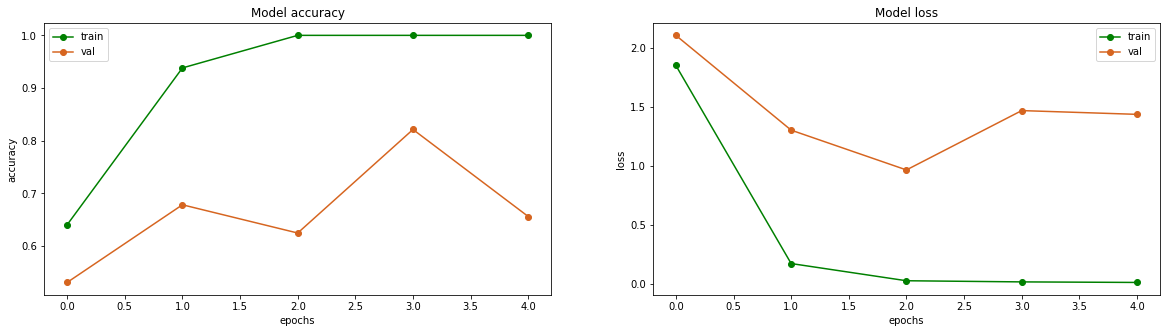

In [9]:
fig1,ax1 = plt.subplots(1,2,figsize = (20,5))
    
for i,j in enumerate(['accuracy','loss']):
    ax1[i].plot(r.history[j],'o-',color = 'green')
    ax1[i].plot(r.history['val_'+j],'o-',color = '#D66520')
    ax1[i].set_title('Model '+str(j))
    ax1[i].set_xlabel('epochs')
    ax1[i].set_ylabel(j)
    ax1[i].legend(['train','val'])

In [10]:
model.evaluate_generator(test_set)

[1.0183440446853638, 0.699999988079071]